In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import itertools

In [18]:
method="deeplift"

In [19]:
load_file_path_fashion=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion', 'Copy of fashion_result.csv')
print(load_file_path_fashion)

load_file_path_svhn=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN', 'Copy of SVHN_result.csv')
print(load_file_path_svhn)

load_file_path_mnist=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist', 'Copy of Mnist_result.csv')
print(load_file_path_mnist)

load_file_path_gtsrb=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB', 'Copy of GTSRB_result.csv')
print(load_file_path_gtsrb)

load_file_path_fashion=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion', 'fashion dl ave var.csv')
print(load_file_path_fashion)

load_file_path_svhn=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN', 'SVHN dl ave var.csv')
print(load_file_path_svhn)

load_file_path_mnist=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist', 'mnsit dl ave var.csv')
print(load_file_path_mnist)

load_file_path_gtsrb=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB/processed data', 'GTSRB dl ave var.csv')
print(load_file_path_gtsrb)

save_folder='/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Analysis'

/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion/Copy of fashion_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN/Copy of SVHN_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist/Copy of Mnist_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB/Copy of GTSRB_result.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion/fashion dl ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/SVHN/SVHN dl ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Mnist/mnsit dl ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/GTSRB/processed data/GTSRB dl ave var.csv


# Hyperparameter anaylsis evaluation on all experiments

In [20]:
def combine_csv_files(file_paths):
    """
    Combine multiple CSV files into a single DataFrame, with an additional column indicating the source file.

    Parameters:
    file_paths (list of str): List of file paths to the CSV files.

    Returns:
    pandas.DataFrame: Combined DataFrame with an additional 'source' column.
    """
    combined_df = pd.DataFrame()

    for file in file_paths:
        # Read each CSV file
        df = pd.read_csv(file_paths[file])

        # Add a new column indicating the source file
        df['source'] = file

        # Append to the combined DataFrame
        combined_df = combined_df.append(df, ignore_index=True)

    return combined_df

file_paths = {'fashion':load_file_path_fashion,'svhn':load_file_path_svhn,'mnist':load_file_path_mnist, 'gtsrb':load_file_path_gtsrb}
combined_df = combine_csv_files(file_paths)

<ipython-input-20-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-20-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-20-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-20-eed506c063ef>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)


In [21]:
combined_df.to_csv(save_folder+"/all naive inception ave var result")
combined_df

,Unnamed: 0,initial_lr,optimizer,criterion,train_data_used,train_set_shuffle,train_batch_size,norm_conv1x1,norm_conv1x1_3x3,norm_conv1x1_5x5,...,conv1x1FLOPS,conv1x1_3x3FLOPS,conv1x1_5x5FLOPS,totalFLOPS,final_test_accuracy,source,train accuracy epoch1,train accuracy epoch2,test accuracy epoch1,test accuracy epoch2
0,0,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,16,0.408432,0.174298,0.417270,...,0.012544,0.909,2.515,13.274,85.482667,fashion,NaN,NaN,NaN,NaN
1,1,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,32,0.410717,0.212547,0.376736,...,0.012544,0.909,2.515,13.274,84.960667,fashion,NaN,NaN,NaN,NaN
2,2,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,64,0.419439,0.235625,0.344935,...,0.012544,0.909,2.515,13.274,84.168667,fashion,NaN,NaN,NaN,NaN
3,3,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,16,0.394719,0.178566,0.426714,...,0.012544,0.909,2.515,13.274,85.304000,fashion,NaN,NaN,NaN,NaN
4,4,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.395707,0.204900,0.399393,...,0.012544,0.909,2.515,13.274,85.299333,fashion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10,0.0007,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.087126,0.341758,0.571116,...,0.049152,1.204,3.301,17.927,80.842966,gtsrb,91.093093,93.760511,79.580892,80.842966
57,11,0.0007,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,64,0.100201,0.318125,0.581675,...,0.049152,1.204,3.301,17.927,80.844022,gtsrb,90.591091,94.115866,79.130641,80.844022
58,15,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,16,0.130309,0.407144,0.462547,...,0.049152,1.204,3.301,17.927,78.706255,gtsrb,87.353854,90.623123,77.934547,78.706255
59,16,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.097700,0.402449,0.499851,...,0.049152,1.204,3.301,17.927,80.382687,gtsrb,89.623624,92.520521,78.893639,80.382687


# Graph

In [22]:
def plot_variance_for_multiple_hyperparam_values(df, hyperparam, variables):
    """
    Plots bar graphs of the average variance of each layer and the overall average variance
    for multiple values of a given hyperparameter.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    hyperparam (str): The hyperparameter to vary.
    variables (list): A list of values for the hyperparameter to compare.

    Returns:
    None: The function plots graphs directly.
    """
    # Check if the hyperparameter exists in the dataframe
    if hyperparam not in df.columns:
        print(f"Column '{hyperparam}' not found in dataframe.")
        return

    # Extracting variance columns
    variance_columns = [col for col in df.columns if 'norm_var' in col]
    variance_columns.append('avg_normalized_variance')

    # Preparing data for plotting
    plot_data = pd.DataFrame()
    for var in variables:
        subset = df[df[hyperparam] == var]
        avg_variances = subset[variance_columns].mean().to_frame().T
        avg_variances['hyperparam_value'] = var
        plot_data = pd.concat([plot_data, avg_variances])

    plot_data.set_index('hyperparam_value', inplace=True)

    # Plotting average variance for each layer and overall average
    plot_data.plot(kind='bar')
    plt.title(f'Average Variance for Different {hyperparam} Values')
    plt.ylabel('Average Variance')
    plt.xlabel(hyperparam)
    plt.xticks(rotation=45)
    plt.show()


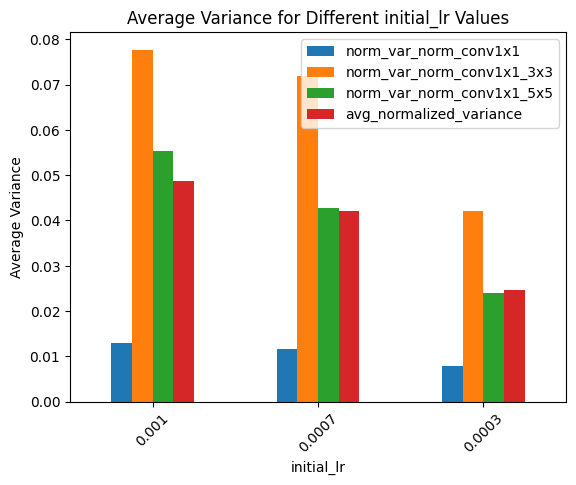

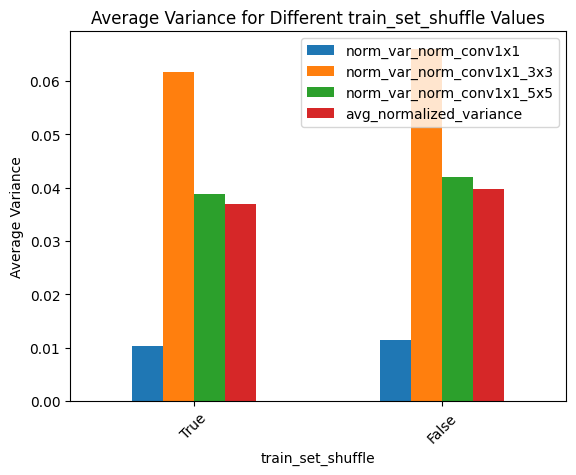

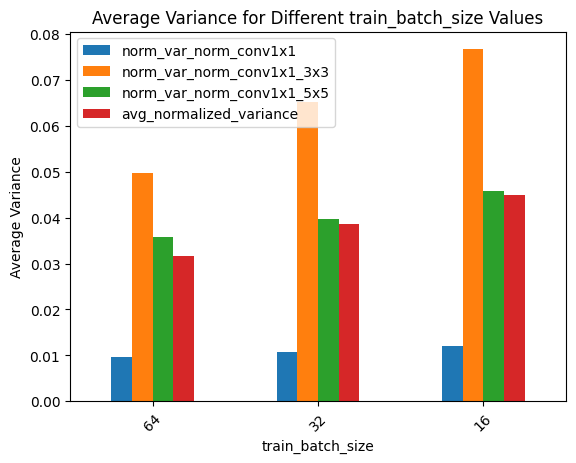

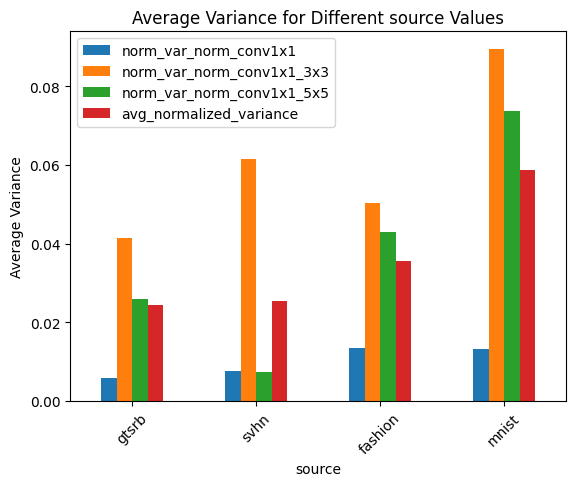

In [23]:
hyperparams_choice_list = {
    'initial_lr': [0.001, 0.0007, 0.0003],
    'train_set_shuffle': [True,False],
    'train_batch_size': [64, 32, 16],
    'source':['gtsrb','svhn', 'fashion', 'mnist']
}
for hyperparam, variables in hyperparams_choice_list.items():
    plot_variance_for_multiple_hyperparam_values(combined_df, hyperparam, variables)

# T test

In [24]:
def perform_t_test(df, target_column, condition_column, choice1, choice2):
    # Splitting the data into two groups based on the condition
    group1 = df[df[condition_column] == choice1][target_column]
    group2 = df[df[condition_column] == choice2][target_column]

    # Performing the independent t-test
    t_statistic, p_value = ttest_ind(group1, group2)

    return t_statistic, p_value

initial_lr

In [25]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0007)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 1.2080574876476498 P-value: 0.2344898871081579


In [26]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0003)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 5.058514801480004 P-value: 1.1057082798094416e-05


In [27]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.0007, 0.0003)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 3.3898646603655163 P-value: 0.001583844793873799


train_set_shuffle

In [28]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_set_shuffle', True, False)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -0.5719744630523665 P-value: 0.5695122216982103


train_batch_size

In [29]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 64, 32)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -1.2414852585700005 P-value: 0.22165757431505864


In [30]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 64, 16)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -2.2487792108918145 P-value: 0.03040452850444475


In [31]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 32, 16)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -1.0422407268562903 P-value: 0.3038857846325048


dataset

In [32]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'fashion', 'mnist')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -6.111311440576633 P-value: 6.177427623460516e-07


In [33]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'svhn', 'fashion')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -2.1283451057351006 P-value: 0.04110543447887018


In [34]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'svhn', 'mnist')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -6.794327220648657 P-value: 1.1123729760550098e-07


# Paired T test

In [35]:
def one_sided_paired_ttest(data_set1, data_set2):
    """
    Perform a one-sided paired t-test to determine if the first data set is statistically larger than the second.

    Parameters:
    data_set1 (array-like): The first set of data.
    data_set2 (array-like): The second set of data.

    Returns:
    tuple: A tuple containing the t-statistic and the one-sided p-value.
    """
    t_statistic, p_value = ttest_rel(data_set1, data_set2)

    # Adjust p-value for one-sided test
    if t_statistic > 0:
        p_value_one_sided = p_value / 2
    else:
        p_value_one_sided = 1 - (p_value / 2)

    return t_statistic, p_value_one_sided

# Example usage:
# t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
# print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)


In [36]:
def find_rows_with_fixed_conditions(df, conditions):
    # Filter the DataFrame based on the conditions
    filtered_df = df
    for column, value in conditions.items():
        filtered_df = filtered_df[filtered_df[column] == value]

    return filtered_df

In [37]:
def generate_hyperparameter_combinations(hyperparams):
    """
    Generate a sequence of hyperparameter combinations.

    :param hyperparams: A dictionary where keys are the names of hyperparameters,
                        and values are lists of possible choices for each hyperparameter.
    :return: A list of dictionaries, each representing a unique combination of hyperparameters.
    """
    # Extract the hyperparameter names and their corresponding choices
    keys, values = zip(*hyperparams.items())

    # Generate all possible combinations of hyperparameter values
    all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    return all_combinations

In [38]:
def get_all_pairs(df, hyperparams_choice_list, target_column, condition_column, choice1, choice2):
    hyperparams_choice_list_compressed = {key: value for key, value in hyperparams_choice_list.items() if key != condition_column}
    all_combinations = generate_hyperparameter_combinations(hyperparams_choice_list_compressed)
    choice1_target_values=[]
    choice2_target_values=[]
    for conditions in all_combinations:
      x = find_rows_with_fixed_conditions(df, conditions)
      try:
        choice1_value = float(x[x[condition_column] == choice1][target_column])
        choice2_value = float(x[x[condition_column] == choice2][target_column])
        print(choice1_value, choice2_value)
      except:
        continue
      choice1_target_values.append(choice1_value)
      choice2_target_values.append(choice2_value)
    return choice1_target_values, choice2_target_values

initial_lr

In [39]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0007)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0324003534241378 0.024273345708211
0.0301957983859301 0.0178707512560437
0.0313567001700842 0.0271359938018783
0.0651296013590605 0.0609650658665182
0.0374761231986734 0.027041357208327
0.0427916300865254 0.0270153366885802
0.0444669716224864 0.0406957893775161
0.0704191735828714 0.0675972427629788
0.0388653135320292 0.0304373425048762
0.051314271084295 0.049421565295204
0.0699402897572888 0.0644939071942761
0.0360317276608691 0.0178193437585606
0.0287771694849385 0.0236562095904702
0.0644593002956799 0.0562419635299799
0.0458376071644931 0.0199457669589349
0.0417852888762348 0.0400245800558862
0.0685874322154137 0.0631731219710234
0.0514009709934505 0.0504148562936145
0.0732368695575013 0.071556530688193
T-statistic: 5.083551443697359 One-sided P-value: 3.875518268857024e-05


In [40]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.0007, 0.0003)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.024273345708211 0.0089455120003716
0.0178707512560437 0.0105983422466725
0.0271359938018783 0.0197588035968372
0.0609650658665182 0.0439153817678163
0.027041357208327 0.0093266603081374
0.0270153366885802 0.0098325306717481
0.0406957893775161 0.0287209146717954
0.0675972427629788 0.0434569180527542
0.0304373425048762 0.0109868828226856
0.0656989745457185 0.0133877812566485
0.049421565295204 0.0350190876532687
0.0644939071942761 0.0420409604839107
0.0178193437585606 0.0075442088695815
0.0236562095904702 0.0201361091486045
0.0562419635299799 0.0375963020457745
0.0199457669589349 0.0101456152603484
0.0400245800558862 0.0278648480463868
0.0631731219710234 0.0440136886472314
0.0389908646177564 0.0148298305445974
0.0504148562936145 0.0289492467633061
0.071556530688193 0.0509933280222311
T-statistic: 8.106991444650728 One-sided P-value: 4.743937101520038e-08


In [41]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0003)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0324003534241378 0.0089455120003716
0.0301957983859301 0.0105983422466725
0.0313567001700842 0.0197588035968372
0.0651296013590605 0.0439153817678163
0.0374761231986734 0.0093266603081374
0.0427916300865254 0.0098325306717481
0.0444669716224864 0.0287209146717954
0.0704191735828714 0.0434569180527542
0.0388653135320292 0.0109868828226856
0.051314271084295 0.0350190876532687
0.0699402897572888 0.0420409604839107
0.0360317276608691 0.0075442088695815
0.0287771694849385 0.0201361091486045
0.0644593002956799 0.0375963020457745
0.0458376071644931 0.0101456152603484
0.0417852888762348 0.0278648480463868
0.0685874322154137 0.0440136886472314
0.0514009709934505 0.0289492467633061
0.0732368695575013 0.0509933280222311
T-statistic: 13.875217045478998 One-sided P-value: 2.357359611460264e-11


train_set_shuffle

In [42]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_set_shuffle', True, False)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0301957983859301 0.0360317276608691
0.0313567001700842 0.0287771694849385
0.0651296013590605 0.0644593002956799
0.0427916300865254 0.0458376071644931
0.0444669716224864 0.0417852888762348
0.0704191735828714 0.0685874322154137
0.051314271084295 0.0514009709934505
0.0699402897572888 0.0732368695575013
0.0178707512560437 0.0178193437585606
0.0271359938018783 0.0236562095904702
0.0609650658665182 0.0562419635299799
0.0270153366885802 0.0199457669589349
0.0406957893775161 0.0400245800558862
0.0675972427629788 0.0631731219710234
0.0656989745457185 0.0389908646177564
0.049421565295204 0.0504148562936145
0.0644939071942761 0.071556530688193
0.0105983422466725 0.0075442088695815
0.0197588035968372 0.0201361091486045
0.0439153817678163 0.0375963020457745
0.0098325306717481 0.0101456152603484
0.0287209146717954 0.0278648480463868
0.0434569180527542 0.0440136886472314
0.0133877812566485 0.0148298305445974
0.0350190876532687 0.0289492467633061
0.0420409604839107 0.0509933280222311
T-statistic: 1.

train_batch_size

In [43]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 32, 64)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0374761231986734 0.0324003534241378
0.0427916300865254 0.0301957983859301
0.0444669716224864 0.0313567001700842
0.0704191735828714 0.0651296013590605
0.0458376071644931 0.0360317276608691
0.0417852888762348 0.0287771694849385
0.0685874322154137 0.0644593002956799
0.027041357208327 0.024273345708211
0.0270153366885802 0.0178707512560437
0.0406957893775161 0.0271359938018783
0.0675972427629788 0.0609650658665182
0.0199457669589349 0.0178193437585606
0.0400245800558862 0.0236562095904702
0.0631731219710234 0.0562419635299799
0.0093266603081374 0.0089455120003716
0.0098325306717481 0.0105983422466725
0.0287209146717954 0.0197588035968372
0.0434569180527542 0.0439153817678163
0.0101456152603484 0.0075442088695815
0.0278648480463868 0.0201361091486045
0.0440136886472314 0.0375963020457745
T-statistic: 6.421250656679793 One-sided P-value: 1.4527274258708921e-06


In [44]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 16, 32)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0388653135320292 0.0374761231986734
0.051314271084295 0.0444669716224864
0.0699402897572888 0.0704191735828714
0.0514009709934505 0.0417852888762348
0.0732368695575013 0.0685874322154137
0.0304373425048762 0.027041357208327
0.0656989745457185 0.0270153366885802
0.049421565295204 0.0406957893775161
0.0644939071942761 0.0675972427629788
0.0389908646177564 0.0199457669589349
0.0504148562936145 0.0400245800558862
0.071556530688193 0.0631731219710234
0.0109868828226856 0.0093266603081374
0.0133877812566485 0.0098325306717481
0.0350190876532687 0.0287209146717954
0.0420409604839107 0.0434569180527542
0.0148298305445974 0.0101456152603484
0.0289492467633061 0.0278648480463868
0.0509933280222311 0.0440136886472314
T-statistic: 3.2425578258011236 One-sided P-value: 0.0022594421224960133


In [45]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 16, 64)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0388653135320292 0.0324003534241378
0.051314271084295 0.0313567001700842
0.0699402897572888 0.0651296013590605
0.0514009709934505 0.0287771694849385
0.0732368695575013 0.0644593002956799
0.0304373425048762 0.024273345708211
0.0656989745457185 0.0178707512560437
0.049421565295204 0.0271359938018783
0.0644939071942761 0.0609650658665182
0.0389908646177564 0.0178193437585606
0.0504148562936145 0.0236562095904702
0.071556530688193 0.0562419635299799
0.0109868828226856 0.0089455120003716
0.0133877812566485 0.0105983422466725
0.0350190876532687 0.0197588035968372
0.0420409604839107 0.0439153817678163
0.0148298305445974 0.0075442088695815
0.0289492467633061 0.0201361091486045
0.0509933280222311 0.0375963020457745
T-statistic: 4.968088416271834 One-sided P-value: 4.974250759273193e-05


dataset

In [46]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'mnist','fashion')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0651296013590605 0.0313567001700842
0.0704191735828714 0.0444669716224864
0.0699402897572888 0.051314271084295
0.0644593002956799 0.0287771694849385
0.0685874322154137 0.0417852888762348
0.0732368695575013 0.0514009709934505
0.0609650658665182 0.0271359938018783
0.0675972427629788 0.0406957893775161
0.0644939071942761 0.049421565295204
0.0562419635299799 0.0236562095904702
0.0631731219710234 0.0400245800558862
0.071556530688193 0.0504148562936145
0.0439153817678163 0.0197588035968372
0.0434569180527542 0.0287209146717954
0.0420409604839107 0.0350190876532687
0.0375963020457745 0.0201361091486045
0.0440136886472314 0.0278648480463868
0.0509933280222311 0.0289492467633061
T-statistic: 12.722305235559027 One-sided P-value: 2.0470671754857155e-10


In [47]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source', 'fashion', 'svhn')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0313567001700842 0.0301957983859301
0.0444669716224864 0.0427916300865254
0.0287771694849385 0.0360317276608691
0.0417852888762348 0.0458376071644931
0.0271359938018783 0.0178707512560437
0.0406957893775161 0.0270153366885802
0.049421565295204 0.0656989745457185
0.0236562095904702 0.0178193437585606
0.0400245800558862 0.0199457669589349
0.0504148562936145 0.0389908646177564
0.0197588035968372 0.0105983422466725
0.0287209146717954 0.0098325306717481
0.0350190876532687 0.0133877812566485
0.0201361091486045 0.0075442088695815
0.0278648480463868 0.0101456152603484
0.0289492467633061 0.0148298305445974
T-statistic: 3.0366938276827904 One-sided P-value: 0.004163180079283161


In [48]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'mnist', 'svhn')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0651296013590605 0.0301957983859301
0.0704191735828714 0.0427916300865254
0.0644593002956799 0.0360317276608691
0.0685874322154137 0.0458376071644931
0.0609650658665182 0.0178707512560437
0.0675972427629788 0.0270153366885802
0.0644939071942761 0.0656989745457185
0.0562419635299799 0.0178193437585606
0.0631731219710234 0.0199457669589349
0.071556530688193 0.0389908646177564
0.0439153817678163 0.0105983422466725
0.0434569180527542 0.0098325306717481
0.0420409604839107 0.0133877812566485
0.0375963020457745 0.0075442088695815
0.0440136886472314 0.0101456152603484
0.0509933280222311 0.0148298305445974
T-statistic: 12.13381442547917 One-sided P-value: 1.8571255120094656e-09


In [49]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'mnist', 'gtsrb')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0651296013590605 0.0324003534241378
0.0704191735828714 0.0374761231986734
0.0699402897572888 0.0388653135320292
0.0609650658665182 0.024273345708211
0.0675972427629788 0.027041357208327
0.0644939071942761 0.0304373425048762
0.0439153817678163 0.0089455120003716
0.0434569180527542 0.0093266603081374
0.0420409604839107 0.0109868828226856
T-statistic: 34.58014449711984 One-sided P-value: 2.6739178220072484e-10


In [50]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'fashion', 'gtsrb')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0313567001700842 0.0324003534241378
0.0444669716224864 0.0374761231986734
0.051314271084295 0.0388653135320292
0.0271359938018783 0.024273345708211
0.0406957893775161 0.027041357208327
0.049421565295204 0.0304373425048762
0.0197588035968372 0.0089455120003716
0.0287209146717954 0.0093266603081374
0.0350190876532687 0.0109868828226856
T-statistic: 4.423152146686031 One-sided P-value: 0.0011085762970890018


In [51]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  'svhn', 'gtsrb')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0301957983859301 0.0324003534241378
0.0427916300865254 0.0374761231986734
0.0178707512560437 0.024273345708211
0.0270153366885802 0.027041357208327
0.0656989745457185 0.0304373425048762
0.0105983422466725 0.0089455120003716
0.0098325306717481 0.0093266603081374
0.0133877812566485 0.0109868828226856
T-statistic: 1.0026984611487655 One-sided P-value: 0.174700177867486
